# Low-Rank Structure in Gaussian Covariances

This notebook explores how low-rank changes in Gaussian coefficient matrices affect covariance structure.
The emphasis is on empirical covariance, eigenvalues, and matrix rank.

## Background

$$
x = W z + \varepsilon,\quad z \sim \mathcal{N}(0, I_k),\quad \varepsilon \sim \mathcal{N}(0, \sigma^2 I_d)
$$

$$
\Sigma = W W^\top + \sigma^2 I_d.
$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

rng = np.random.default_rng(0)

In [52]:
d = 40
k = 8
sigma = 0.1
n = 1500

W0 = rng.normal(size=(d, k))
Sigma0 = W0 @ W0.T + sigma**2 * np.eye(d)

## Low-Rank vs Diffuse Coefficient Changes

In [53]:
rank_star = 2

B = rng.normal(size=(d, rank_star))
A = rng.normal(size=(rank_star, k))
DeltaW_lr = B @ A

D = rng.normal(size=(d, k))
DeltaW_dense = D / np.linalg.norm(D, 'fro') * np.linalg.norm(DeltaW_lr, 'fro')

In [54]:
def sample(W):
    z = rng.normal(size=(n, k))
    eps = sigma * rng.normal(size=(n, d))
    return z @ W.T + eps

S_lr = (sample(W0 + DeltaW_lr).T @ sample(W0 + DeltaW_lr)) / n
S_dense = (sample(W0 + DeltaW_dense).T @ sample(W0 + DeltaW_dense)) / n

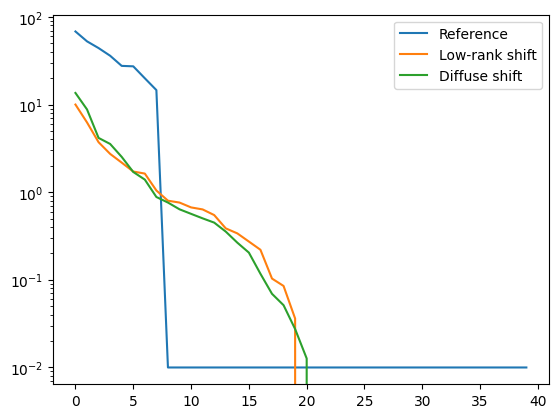

In [55]:
eig0 = eigvalsh(Sigma0)
eig_lr = eigvalsh(S_lr)
eig_dense = eigvalsh(S_dense)

plt.semilogy(eig0[::-1], label='Reference')
plt.semilogy(eig_lr[::-1], label='Low-rank shift')
plt.semilogy(eig_dense[::-1], label='Diffuse shift')
plt.legend()
plt.show()

**Quantifying “significant change**

We define an eigenvalue as significantly changed if it differs from the corresponding eigenvalue of the reference covariance by more than a fixed threshold.

In the low-rank case, only a small number of eigenvalues change significantly. In this notebook, the rank of the modification is set to rank_star = 2, and we observe that only about two eigenvalues differ noticeably from the reference spectrum. The rest of the eigenvalues remain close to the original values and stay near the noise floor.

In the diffuse case, many eigenvalues change by more than the threshold. Even though the total magnitude of the modification is the same as in the low-rank case, the changes are spread across many directions, causing a larger portion of the spectrum to be affected.

**Interpretation of the results**

Low-rank modification:
In the low-rank case, only a few eigenvalues change substantially. This matches the rank of the coefficient change, which limits how many independent directions in the data can be affected. As a result, variance increases are concentrated in a small number of directions, while the remaining directions are dominated by noise.

Diffuse modification:
In the diffuse case, many eigenvalues are affected even though the overall size of the change is the same. Because the modification is spread across many directions, each direction experiences a smaller change, but together this leads to widespread shifts across the eigenvalue spectrum.

Connection to matrix rank:
These results show that matrix rank directly limits the number of variance directions that can change. Low-rank changes lead to a small number of large eigenvalue shifts, while higher-rank (diffuse) changes produce smaller but more widespread effects. Eigenvalues provide a clear way to see how rank controls the structure of variance in Gaussian data.

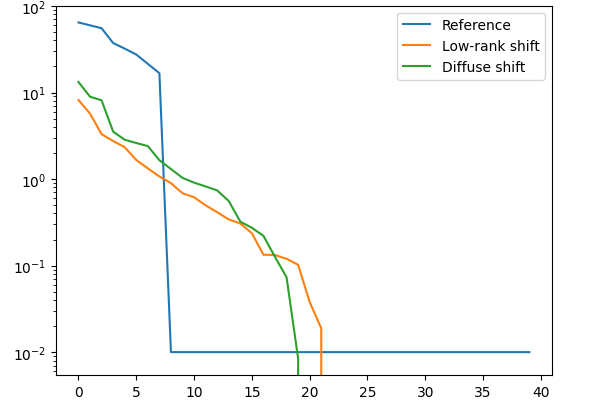

**Change in Rank Star to 5**
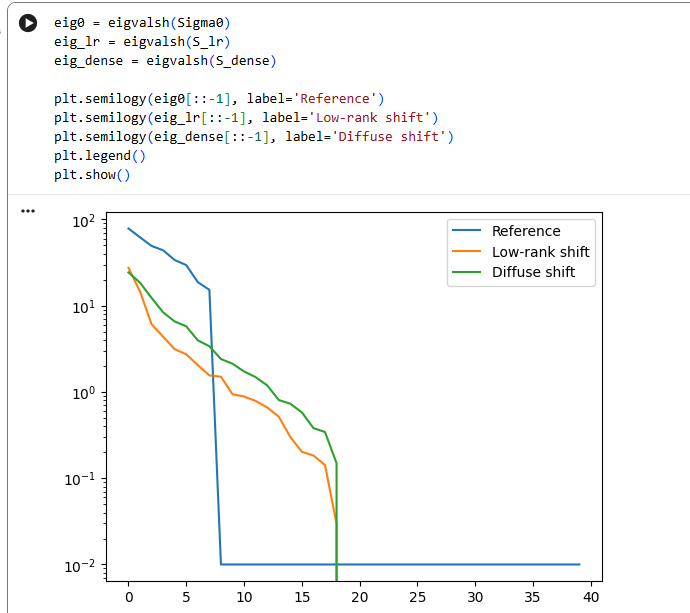